# Abstract:

## Motivación:
El proyecto que se estara realizando tendra como objetivo predecir el valor en euros de los jugadores de futbol a nivel mundial.
Dada la importancia que tiene en el futbol la compara y venta de jugadores, se ha decidido analizar información de diferentes fuentes con el objetivo de lograr predecir cual es el valor de un jugador de acuerdo a diferentes caracteristicas y estadisticas del mismo.
El futbol es un deporte que ha venido siendo impactado cada vez mas por los negocios, y una de las principales fuentes de ingresos de los equipos de futbol es la compra y venta de jugadores. Por lo que es importante conocer en que momento se debe comprar un jugador de acuerdo con el precio que se logre predecir con este modelo.

## Audiencia:
Equipos de futbol en general que busquen optimizar sus recursos y tomar deciciones de compra y venta de jugadores informadas.

# Imoprtación de librerias

In [ ]:
#Imporación de las librerias que estaremos utilizando durante el proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#conexión con google drive
from google.colab import drive
import os
drive.mount ("/content/drive")
print (os.getcwd())
os.chdir("/content/drive/My Drive/Curso Data Science II - Coder House/ProyectoFinal_DSII")
print(os.getcwd)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Curso Data Science II - Coder House/ProyectoFinal_DSII
<built-in function getcwd>


# Cargue de fuentes de datos.

In [ ]:
rutaArchivos = '/content/drive/My Drive/Curso Data Science II - Coder House/ProyectoFinal_DSII'

In [ ]:
valorJugadores = pd.read_csv(rutaArchivos + '/player_valuations.csv')
jugadores = pd.read_csv(rutaArchivos + '/players.csv')
equipos = pd.read_csv(rutaArchivos + '/clubs.csv')
competiciones = pd.read_csv(rutaArchivos + '/competitions.csv')
appearances = pd.read_csv(rutaArchivos + '/appearances.csv')

In [ ]:
valorJugadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473666 entries, 0 to 473665
Data columns (total 5 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   player_id                            473666 non-null  int64 
 1   date                                 473666 non-null  object
 2   market_value_in_eur                  473666 non-null  int64 
 3   current_club_id                      473666 non-null  int64 
 4   player_club_domestic_competition_id  473666 non-null  object
dtypes: int64(3), object(2)
memory usage: 18.1+ MB


In [ ]:
jugadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30521 entries, 0 to 30520
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   player_id                             30521 non-null  int64  
 1   first_name                            28534 non-null  object 
 2   last_name                             30521 non-null  object 
 3   name                                  30521 non-null  object 
 4   last_season                           30521 non-null  int64  
 5   current_club_id                       30521 non-null  int64  
 6   player_code                           30521 non-null  object 
 7   country_of_birth                      27828 non-null  object 
 8   city_of_birth                         28341 non-null  object 
 9   country_of_citizenship                29951 non-null  object 
 10  date_of_birth                         30476 non-null  object 
 11  sub_position   

In [ ]:
appearances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583646 entries, 0 to 1583645
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   appearance_id           1583646 non-null  object
 1   game_id                 1583646 non-null  int64 
 2   player_id               1583646 non-null  int64 
 3   player_club_id          1583646 non-null  int64 
 4   player_current_club_id  1583646 non-null  int64 
 5   date                    1583646 non-null  object
 6   player_name             1583640 non-null  object
 7   competition_id          1583646 non-null  object
 8   yellow_cards            1583646 non-null  int64 
 9   red_cards               1583646 non-null  int64 
 10  goals                   1583646 non-null  int64 
 11  assists                 1583646 non-null  int64 
 12  minutes_played          1583646 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 157.1+ MB


In [ ]:
jugadores.head()

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,right,184.0,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,left,190.0,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,NaN,NaN,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0
3,77,NaN,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,...,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus Football Club,200000.0,24500000.0
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,right,194.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,FC Bayern München,100000.0,3000000.0


Eliminar 2 columnas que no tienen relevancia para el proyecto:
1. image_url
2. url

In [ ]:
jugadores.drop(['image_url', 'url'], axis=1, inplace=True)

In [ ]:
jugadores.head() #Tabla de jugadores sin las columnas 'image_url' y 'url'

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,sub_position,position,foot,height_in_cm,contract_expiration_date,agent_name,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,Centre-Forward,Attack,right,184.0,NaN,ASBW Sport Marketing,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,Goalkeeper,Goalkeeper,left,190.0,NaN,Neubauer 13 GmbH,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,Centre-Forward,Attack,NaN,NaN,NaN,CSKA-AS-23 Ltd.,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0
3,77,NaN,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,...,Centre-Back,Defender,NaN,NaN,NaN,NaN,IT1,Juventus Football Club,200000.0,24500000.0
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,Goalkeeper,Goalkeeper,right,194.0,NaN,IFM,L1,FC Bayern München,100000.0,3000000.0


In [ ]:
jugadores.loc[jugadores['name']=='Lionel Messi'].sort_values(by=['last_season'],ascending=False).head(50)

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,sub_position,position,foot,height_in_cm,contract_expiration_date,agent_name,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
2347,28003,Lionel,Messi,Lionel Messi,2022,583,lionel-messi,Argentina,Rosario,Argentina,...,Right Winger,Attack,left,170.0,NaN,NaN,FR1,Paris Saint-Germain Football Club,35000000.0,180000000.0


In [ ]:
appearances.loc[appearances['player_name'] == 'Lionel Messi'].sort_values(by=['date'],ascending=False).head(5)

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
1444591,3840451_28003,3840451,28003,583,583,2023-06-03,Lionel Messi,FR1,0,0,0,0,90
1442160,3840442_28003,3840442,28003,583,583,2023-05-27,Lionel Messi,FR1,0,0,1,0,90
1439665,3840426_28003,3840426,28003,583,583,2023-05-21,Lionel Messi,FR1,0,0,0,1,90
1435751,3840419_28003,3840419,28003,583,583,2023-05-13,Lionel Messi,FR1,0,0,0,0,90
1430592,3840290_28003,3840290,28003,583,583,2023-04-30,Lionel Messi,FR1,0,0,0,0,90


In [ ]:
valorJugadores.loc[valorJugadores['player_id'] == 10].sort_values(by=['date'],ascending=False).head(50)

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
157420,10,2016-01-04,1000000,398,IT1
144690,10,2015-07-01,1000000,398,IT1
129148,10,2015-01-07,1000000,398,IT1
118209,10,2014-07-07,1000000,398,IT1
106494,10,2014-01-07,1000000,398,IT1
96597,10,2013-06-19,2000000,398,IT1
87552,10,2013-01-14,4000000,398,IT1
77489,10,2012-07-03,6000000,398,IT1
66734,10,2012-01-11,6000000,398,IT1
56109,10,2011-06-29,5000000,398,IT1


## Preparación de las fuentes de datos

La tabla de appearances la vamos a agrupar por año, con el objetivo de conocer la información por año calendario.

In [ ]:
#Asegurarnos que la columna 'date' este en datetime
appearances['date'] = pd.to_datetime(appearances['date'])

In [ ]:
appearances.info()#validar que la columna 'date' este en datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583646 entries, 0 to 1583645
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   appearance_id           1583646 non-null  object        
 1   game_id                 1583646 non-null  int64         
 2   player_id               1583646 non-null  int64         
 3   player_club_id          1583646 non-null  int64         
 4   player_current_club_id  1583646 non-null  int64         
 5   date                    1583646 non-null  datetime64[ns]
 6   player_name             1583640 non-null  object        
 7   competition_id          1583646 non-null  object        
 8   yellow_cards            1583646 non-null  int64         
 9   red_cards               1583646 non-null  int64         
 10  goals                   1583646 non-null  int64         
 11  assists                 1583646 non-null  int64         
 12  minutes_played

Extraer el año de la fecha para poder agrupar las estadisticas de los jugadores por año calendario.

In [ ]:
#Crear una columna con el año de la fecha
appearances['year'] = appearances['date'].dt.year

In [ ]:
appearances.head()

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played,year
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90,2012
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90,2012
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45,2012
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90,2012
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90,2012


In [ ]:
estAnueales = appearances

In [ ]:
appearances.loc[appearances['player_name'] == 'Lionel Messi'].head(5)

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played,year
8135,2244378_28003,2244378,28003,131,583,2012-08-19,Lionel Messi,ES1,0,0,2,0,90,2012
8929,2244388_28003,2244388,28003,131,583,2012-08-22,Lionel Messi,SUC,0,0,1,0,90,2012
11912,2242828_28003,2242828,28003,131,583,2012-08-26,Lionel Messi,ES1,0,0,2,0,90,2012
12883,2244389_28003,2244389,28003,131,583,2012-08-29,Lionel Messi,SUC,0,0,1,0,90,2012
15970,2242881_28003,2242881,28003,131,583,2012-09-02,Lionel Messi,ES1,0,0,0,1,90,2012


In [ ]:
#Crear una tabla anualizando las estadisticas de los jugadores
estAnueales = appearances.groupby(['player_id','player_name','year']).agg({'appearance_id':'count','minutes_played':'sum','yellow_cards':'sum','red_cards':'sum','goals':'sum','assists':'sum'})

In [ ]:
estAnueales

appearance_id  minutes_played  \
player_id player_name         year                                  
10        Miroslav Klose      2012             20            1483   
                              2013             29            2052   
                              2014             31            1766   
                              2015             36            2429   
                              2016             20            1078   
...                                           ...             ...   
1187799   Franciszek Franczak 2023              4             233   
                              2024              4             151   
1201294   Ozan Demirbağ       2024              4              73   
1229924   Adama Sidibeh       2024             10             639   
1240467   Artem Prysyazhnyuk  2024              7              82   

                                    yellow_cards  red_cards  goals  assists  
player_id player_name         year                                           
10        Miroslav Klose      2012             6          0     11        1  
                              2013             3          0      9        4  
                              2014             3          0      8        6  
                              2015             6          0     12        8  
                              2016             1          0      8        6  
...                                          ...        ...    ...      ...  
1187799   Franciszek Franczak 2023             1          0      0        0  
                              2024             0          0      0        0  
1201294   Ozan Demirbağ       2024             0          0      0        0  
1229924   Adama Sidibeh       2024             2          0      2        0  
1240467   Artem Prysyazhnyuk  2024             0          0      0        0  

[97261 rows x 6 columns]

In [ ]:
appearances[['player_id','player_name','player_club_id','competition_id','date']].loc[appearances['player_name'] == 'Lionel Messi']

,player_id,player_name,player_club_id,competition_id,date
8135,28003,Lionel Messi,131,ES1,2012-08-19
8929,28003,Lionel Messi,131,SUC,2012-08-22
11912,28003,Lionel Messi,131,ES1,2012-08-26
12883,28003,Lionel Messi,131,SUC,2012-08-29
15970,28003,Lionel Messi,131,ES1,2012-09-02
...,...,...,...,...,...
1430592,28003,Lionel Messi,583,FR1,2023-04-30
1435751,28003,Lionel Messi,583,FR1,2023-05-13
1439665,28003,Lionel Messi,583,FR1,2023-05-21
1442160,28003,Lionel Messi,583,FR1,2023-05-27


In [ ]:
equipos.loc[equipos['club_id'] == 583]

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,filename,url
233,583,fc-paris-saint-germain,Paris Saint-Germain Football Club,FR1,NaN,30,25.4,17,56.7,19,Parc des Princes,48583,€-247.00m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-paris-saint...


In [ ]:
#Definir el club en el que jugo cada año
clubAnual = appearances[['player_id','player_name','player_club_id','date','year']]

In [ ]:
#Se definio utilizar el club en el que estaba el ultimo partido del año
ultimaFecha = clubAnual.groupby(['player_id','year'])['date'].max()

In [ ]:
#Unificar las tablas de cual fue el equipo de la temporada del jugador
ultimaFecha = pd.merge(clubAnual,ultimaFecha,on=['player_id','year','date'], how = 'inner')

In [ ]:
ultimoClub = ultimaFecha[['player_id', 'player_name', 'year', 'player_club_id']]
ultimoClub.loc[ultimoClub['player_name'] == 'Miroslav Klose']

,player_id,player_name,year,player_club_id
4506,10,Miroslav Klose,2012,398
12344,10,Miroslav Klose,2013,398
19759,10,Miroslav Klose,2014,398
25706,10,Miroslav Klose,2015,398
30546,10,Miroslav Klose,2016,398


In [ ]:
valorJugadores['date'] = pd.to_datetime(valorJugadores['date'])

In [ ]:
valorJugadores['year'] = valorJugadores['date'].dt.year

In [ ]:
#Para definir el valor del jugador en cada año utilizamos el valor maximo del año
valorJugadoresAnual = valorJugadores.groupby(['player_id','year']).agg({'market_value_in_eur':'max'})

In [ ]:
#Obtener el valor maximo del año de cada jugador
valorJugadoresAnual

market_value_in_eur
player_id year                     
10        2004              7000000
          2005             15000000
          2006             30000000
          2007             23000000
          2008             20000000
...                             ...
1214946   2024               150000
1225269   2024                50000
1229924   2024               250000
1240467   2024                50000
1240762   2024                50000

[243152 rows x 1 columns]

# Iniciar la construcción del dataframe que se utilizara para el modelo

In [ ]:
df = estAnueales.reset_index()

In [ ]:
df = pd.merge(df,ultimoClub[['player_id','year','player_club_id']], on=['player_id', 'year'], how='left')

In [ ]:
df

,player_id,player_name,year,appearance_id,minutes_played,yellow_cards,red_cards,goals,assists,player_club_id
0,10,Miroslav Klose,2012,20,1483,6,0,11,1,398
1,10,Miroslav Klose,2013,29,2052,3,0,9,4,398
2,10,Miroslav Klose,2014,31,1766,3,0,8,6,398
3,10,Miroslav Klose,2015,36,2429,6,0,12,8,398
4,10,Miroslav Klose,2016,20,1078,1,0,8,6,398
...,...,...,...,...,...,...,...,...,...,...
97256,1187799,Franciszek Franczak,2023,4,233,1,0,0,0,2578
97257,1187799,Franciszek Franczak,2024,4,151,0,0,0,0,2578
97258,1201294,Ozan Demirbağ,2024,4,73,0,0,0,0,3840
97259,1229924,Adama Sidibeh,2024,10,639,2,0,2,0,2578


In [ ]:
equipos[['club_id','name','domestic_competition_id']]

,club_id,name,domestic_competition_id
0,105,Sportverein Darmstadt 1898 e. V.,L1
1,11127,FK Ural Yekaterinburg,RU1
2,114,Beşiktaş Jimnastik Kulübü,TR1
3,12,Associazione Sportiva Roma,IT1
4,148,Tottenham Hotspur Football Club,GB1
...,...,...,...
421,68608,CF Os Belenenses,PO1
422,724,Football Club Volendam,NL1
423,800,Atalanta Bergamasca Calcio S.p.a.,IT1
424,979,Moreirense Futebol Clube,PO1


In [ ]:
#Agregar al dataframe una columna que hara referencia a la liga en la que compite el club
df = pd.merge(df,equipos[['club_id','domestic_competition_id']],
                     left_on=['player_club_id'],
                     right_on=['club_id'],
                     how='left')

In [ ]:
df = df.drop(['club_id'], axis=1)

In [ ]:
df.loc[df['player_name'] == 'Lionel Messi']

,player_id,player_name,year,appearance_id,minutes_played,yellow_cards,red_cards,goals,assists,player_club_id,domestic_competition_id
9313,28003,Lionel Messi,2012,26,2220,1,0,35,9,131,ES1
9314,28003,Lionel Messi,2013,40,3018,1,0,39,12,131,ES1
9315,28003,Lionel Messi,2014,52,4531,5,0,50,20,131,ES1
9316,28003,Lionel Messi,2015,53,4559,5,0,48,27,131,ES1
9317,28003,Lionel Messi,2016,51,4429,7,0,51,27,131,ES1
9318,28003,Lionel Messi,2017,57,4931,9,0,50,19,131,ES1
9319,28003,Lionel Messi,2018,49,3953,5,0,47,26,131,ES1
9320,28003,Lionel Messi,2019,48,3877,4,0,45,17,131,ES1
9321,28003,Lionel Messi,2020,44,3915,8,0,26,23,131,ES1
9322,28003,Lionel Messi,2021,45,3933,4,1,34,14,583,FR1


In [ ]:
#Agregar la columna del valor del mercado en cada año

df = pd.merge(df,valorJugadoresAnual, on=['player_id','year'], how='left')

In [ ]:
df

,player_id,player_name,year,appearance_id,minutes_played,yellow_cards,red_cards,goals,assists,player_club_id,domestic_competition_id,market_value_in_eur
0,10,Miroslav Klose,2012,20,1483,6,0,11,1,398,IT1,6000000.0
1,10,Miroslav Klose,2013,29,2052,3,0,9,4,398,IT1,4000000.0
2,10,Miroslav Klose,2014,31,1766,3,0,8,6,398,IT1,1000000.0
3,10,Miroslav Klose,2015,36,2429,6,0,12,8,398,IT1,1000000.0
4,10,Miroslav Klose,2016,20,1078,1,0,8,6,398,IT1,1000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
97256,1187799,Franciszek Franczak,2023,4,233,1,0,0,0,2578,SC1,75000.0
97257,1187799,Franciszek Franczak,2024,4,151,0,0,0,0,2578,SC1,150000.0
97258,1201294,Ozan Demirbağ,2024,4,73,0,0,0,0,3840,TR1,100000.0
97259,1229924,Adama Sidibeh,2024,10,639,2,0,2,0,2578,SC1,250000.0


In [ ]:
jugadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30521 entries, 0 to 30520
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   player_id                             30521 non-null  int64  
 1   first_name                            28534 non-null  object 
 2   last_name                             30521 non-null  object 
 3   name                                  30521 non-null  object 
 4   last_season                           30521 non-null  int64  
 5   current_club_id                       30521 non-null  int64  
 6   player_code                           30521 non-null  object 
 7   country_of_birth                      27828 non-null  object 
 8   city_of_birth                         28341 non-null  object 
 9   country_of_citizenship                29951 non-null  object 
 10  date_of_birth                         30476 non-null  object 
 11  sub_position   

In [ ]:
#Seleccionar las variables que necesitamos de la tabla de jugadores
jugadoresUtil = jugadores[['player_id','country_of_birth','city_of_birth','country_of_citizenship','date_of_birth','sub_position','position','foot','height_in_cm']]

In [ ]:
jugadoresUtil['date_of_birth'] = pd.to_datetime(jugadoresUtil['date_of_birth']) #convertir la fecha al formato correcto

In [ ]:
jugadoresUtil.info() #validar que la fecha este en el formato correcto


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30521 entries, 0 to 30520
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   player_id               30521 non-null  int64         
 1   country_of_birth        27828 non-null  object        
 2   city_of_birth           28341 non-null  object        
 3   country_of_citizenship  29951 non-null  object        
 4   date_of_birth           30476 non-null  datetime64[ns]
 5   sub_position            30347 non-null  object        
 6   position                30521 non-null  object        
 7   foot                    28170 non-null  object        
 8   height_in_cm            28490 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 2.1+ MB


In [ ]:
#Agregar al dataframe la información de los jugadores que vamos a utilizar
df = pd.merge(df,jugadoresUtil,
                     on=['player_id'], how='left')

In [ ]:
#Verificar como quedo el dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97261 entries, 0 to 97260
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   player_id                97261 non-null  int64         
 1   player_name              97261 non-null  object        
 2   year                     97261 non-null  int32         
 3   appearance_id            97261 non-null  int64         
 4   minutes_played           97261 non-null  int64         
 5   yellow_cards             97261 non-null  int64         
 6   red_cards                97261 non-null  int64         
 7   goals                    97261 non-null  int64         
 8   assists                  97261 non-null  int64         
 9   player_club_id           97261 non-null  int64         
 10  domestic_competition_id  94948 non-null  object        
 11  market_value_in_eur      93610 non-null  float64       
 12  country_of_birth         92963 n

# Ordenar el dataframe y renombrar las columnas

In [ ]:
#Nuevo orden y nombres de las columnas

orderNames = {
    'player_id': 'id_jugador',
    'player_name': 'nombre_jugador',
    'country_of_birth': 'pais_nacimiento',
    'city_of_birth': 'ciudad_nacimiento',
    'country_of_citizenship': 'pais_nacionalidad',
    'date_of_birth': 'fecha_nacimiento',
    'sub_position': 'sub_posicion',
    'position': 'posicion',
    'foot': 'pie',
    'height_in_cm': 'altura_cm',
    'year': 'temporada',
    'player_club_id': 'id_club',
    'domestic_competition_id': 'id_competencia',
    'appearance_id': 'partidos_jugados',
    'minutes_played': 'minutos_jugados',
    'yellow_cards': 'tarjetas_amarillas',
    'red_cards': 'tarjetas_rojas',
    'goals': 'goles',
    'assists': 'asistencias',
    'market_value_in_eur': 'valor_mercado'
}

df = df.rename(columns=orderNames)[orderNames.values()]

In [ ]:
df.loc[df['nombre_jugador'] == 'Neymar']

,id_jugador,nombre_jugador,pais_nacimiento,ciudad_nacimiento,pais_nacionalidad,fecha_nacimiento,sub_posicion,posicion,pie,altura_cm,temporada,id_club,id_competencia,partidos_jugados,minutos_jugados,tarjetas_amarillas,tarjetas_rojas,goles,asistencias,valor_mercado
26879,68290,Neymar,Brazil,Mogi das Cruzes,Brazil,1992-02-05,Left Winger,Attack,right,175.0,2013,131,ES1,23,1786,7,0,11,12,50000000.0
26880,68290,Neymar,Brazil,Mogi das Cruzes,Brazil,1992-02-05,Left Winger,Attack,right,175.0,2014,131,ES1,36,2372,4,0,18,6,70000000.0
26881,68290,Neymar,Brazil,Mogi das Cruzes,Brazil,1992-02-05,Left Winger,Attack,right,175.0,2015,131,ES1,53,4573,11,0,41,20,100000000.0
26882,68290,Neymar,Brazil,Mogi das Cruzes,Brazil,1992-02-05,Left Winger,Attack,right,175.0,2016,131,ES1,47,4244,14,0,21,26,100000000.0
26883,68290,Neymar,Brazil,Mogi das Cruzes,Brazil,1992-02-05,Left Winger,Attack,right,175.0,2017,583,FR1,47,4165,14,1,31,24,150000000.0
26884,68290,Neymar,Brazil,Mogi das Cruzes,Brazil,1992-02-05,Left Winger,Attack,right,175.0,2018,583,FR1,26,2215,5,0,24,12,180000000.0
26885,68290,Neymar,Brazil,Mogi das Cruzes,Brazil,1992-02-05,Left Winger,Attack,right,175.0,2019,583,FR1,17,1412,1,0,13,8,180000000.0
26886,68290,Neymar,Brazil,Mogi das Cruzes,Brazil,1992-02-05,Left Winger,Attack,right,175.0,2020,583,FR1,22,1856,10,1,16,9,128000000.0
26887,68290,Neymar,Brazil,Mogi das Cruzes,Brazil,1992-02-05,Left Winger,Attack,right,175.0,2021,583,FR1,30,2422,9,0,10,7,110000000.0
26888,68290,Neymar,Brazil,Mogi das Cruzes,Brazil,1992-02-05,Left Winger,Attack,right,175.0,2022,583,FR1,35,2823,16,0,25,18,75000000.0


# Alistar el Data Frame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97261 entries, 0 to 97260
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id_jugador          97261 non-null  int64         
 1   nombre_jugador      97261 non-null  object        
 2   pais_nacimiento     92963 non-null  object        
 3   ciudad_nacimiento   94954 non-null  object        
 4   pais_nacionalidad   95232 non-null  object        
 5   fecha_nacimiento    97207 non-null  datetime64[ns]
 6   sub_posicion        97088 non-null  object        
 7   posicion            97261 non-null  object        
 8   pie                 94955 non-null  object        
 9   altura_cm           95591 non-null  float64       
 10  temporada           97261 non-null  int32         
 11  id_club             97261 non-null  int64         
 12  id_competencia      94948 non-null  object        
 13  partidos_jugados    97261 non-null  int64     

In [ ]:
#Revisar los nulos
df.isnull().sum()

id_jugador               0
nombre_jugador           0
pais_nacimiento       4298
ciudad_nacimiento     2307
pais_nacionalidad     2029
fecha_nacimiento        54
sub_posicion           173
posicion                 0
pie                   2306
altura_cm             1670
temporada                0
id_club                  0
id_competencia        2313
partidos_jugados         0
minutos_jugados          0
tarjetas_amarillas       0
tarjetas_rojas           0
goles                    0
asistencias              0
valor_mercado         3651
dtype: int64

In [ ]:
#Los registros que tengan nulo en el pais de nacimiento, pero si tengan pais nacionalidad. se colocara el pais nacionalidad en pais nacimiento
df['pais_nacimiento'] = df['pais_nacimiento'].fillna(df['pais_nacionalidad'])

In [ ]:
df.isnull().sum()

id_jugador               0
nombre_jugador           0
pais_nacimiento       2029
ciudad_nacimiento     2307
pais_nacionalidad     2029
fecha_nacimiento        54
sub_posicion           173
posicion                 0
pie                   2306
altura_cm             1670
temporada                0
id_club                  0
id_competencia        2313
partidos_jugados         0
minutos_jugados          0
tarjetas_amarillas       0
tarjetas_rojas           0
goles                    0
asistencias              0
valor_mercado         3651
dtype: int64

In [ ]:
df_prueba = df

Importar información desde la API "restcountries" para completar información con respecto a las capitales de los paises

In [ ]:
#Crear un dataframe con los paises del mundo y sus respectivas capitales
import requests

url = "https://restcountries.com/v3.1/all"

response = requests.get(url)
data = response.json()

dataCapitales = []

# Mostrar las capitales
for country in data:
    name = country.get('name', {}).get('common', 'N/A')
    capital = country.get('capital', ['N/A'])[0]

    dataCapitales.append({
        'País': name,
        'Capital': capital
    })

df_capitales = pd.DataFrame(dataCapitales)

In [ ]:
#Vamos a agregar las columnas del dataframe que se creo
df = df.merge(df_capitales, left_on='pais_nacimiento', right_on='País', how='left')

In [ ]:
#Para llenar los nulos de la ciudad de nacimiento lo que se hizo es colocar la capital del pais, como ciudad de nacimiento
df['ciudad_nacimiento'] = df['ciudad_nacimiento'].fillna(df['Capital'])

In [ ]:
#Eliminar las columnas que se agregaron para reemplazar los nulos de ciudad y pais de nacimiento
df = df.drop(['País', 'Capital'], axis=1)

In [ ]:
df.isnull().sum()#Validamos nuevamente los nulos, para verificar que hayan disminuido en pais de nacimiento y en ciudad de nacimiento

id_jugador               0
nombre_jugador           0
pais_nacimiento       2029
ciudad_nacimiento      186
pais_nacionalidad     2029
fecha_nacimiento        54
sub_posicion           173
posicion                 0
pie                   2306
altura_cm             1670
temporada                0
id_club                  0
id_competencia        2313
partidos_jugados         0
minutos_jugados          0
tarjetas_amarillas       0
tarjetas_rojas           0
goles                    0
asistencias              0
valor_mercado         3651
dtype: int64

In [ ]:
#Los jugadores que no tienen sub posicion quedaran con la misma posicion en el campo subposicion
df['sub_posicion'] = df['sub_posicion'].fillna(df['posicion'])

Eliminar los registros que no tienen valor de mercado

In [ ]:
#Eliminar los nulos de valor de mercado
df = df.dropna(subset=['valor_mercado'])

In [ ]:
df.isnull().sum()#Validamos que no queden nulos en valor_mercado

id_jugador               0
nombre_jugador           0
pais_nacimiento       1977
ciudad_nacimiento      148
pais_nacionalidad     1977
fecha_nacimiento        51
sub_posicion             0
posicion                 0
pie                   1971
altura_cm             1446
temporada                0
id_club                  0
id_competencia        1929
partidos_jugados         0
minutos_jugados          0
tarjetas_amarillas       0
tarjetas_rojas           0
goles                    0
asistencias              0
valor_mercado            0
dtype: int64

In [ ]:
#Los nulos de id_competencia se van a reemplazar por la sigla 'LNC' considerandolo liga no competitiva, ya que el equipo no hace parte de ninguna de las ligas competitivas.
df['id_competencia'] = df['id_competencia'].fillna('LNC')

In [ ]:
df.isnull().sum()

id_jugador               0
nombre_jugador           0
pais_nacimiento       1977
ciudad_nacimiento      148
pais_nacionalidad     1977
fecha_nacimiento        51
sub_posicion             0
posicion                 0
pie                   1971
altura_cm             1446
temporada                0
id_club                  0
id_competencia           0
partidos_jugados         0
minutos_jugados          0
tarjetas_amarillas       0
tarjetas_rojas           0
goles                    0
asistencias              0
valor_mercado            0
dtype: int64

In [ ]:
df['pie'].unique()

array(['right', 'left', nan, 'both'], dtype=object)

Revisar cual es la mejor forma para imputar nulos de variables como la altura_cm, la fecha de nacimiento y el pie

In [ ]:
df.describe()

,id_jugador,fecha_nacimiento,altura_cm,temporada,id_club,partidos_jugados,minutos_jugados,tarjetas_amarillas,tarjetas_rojas,goles,asistencias,valor_mercado
count,9.361000e+04,93559,92164.000000,93610.000000,93610.000000,93610.000000,93610.000000,93610.000000,93610.000000,93610.000000,93610.000000,9.361000e+04
mean,2.174498e+05,1992-07-16 11:14:02.022680704,182.230980,2018.082780,3615.015917,16.679821,1159.810116,2.475195,0.063476,1.608867,1.267931,4.250344e+06
min,1.000000e+01,1970-10-20 00:00:00,159.000000,2012.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+04
25%,5.997000e+04,1988-07-19 00:00:00,178.000000,2015.000000,347.000000,7.000000,330.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+05
50%,1.613560e+05,1992-08-22 00:00:00,182.000000,2018.000000,979.000000,15.000000,955.000000,2.000000,0.000000,0.000000,0.000000,1.000000e+06
75%,3.204400e+05,1996-09-12 12:00:00,187.000000,2021.000000,2727.000000,25.000000,1748.000000,4.000000,0.000000,2.000000,2.000000,3.500000e+06
max,1.240467e+06,2008-02-12 00:00:00,207.000000,2024.000000,101634.000000,61.000000,5174.000000,23.000000,3.000000,59.000000,33.000000,2.000000e+08
std,1.971396e+05,NaN,6.637224,3.620165,8766.902841,11.790257,970.239484,2.747802,0.256543,3.224279,2.210941,9.705915e+06


Reemplazar los nulos de la altura_cm

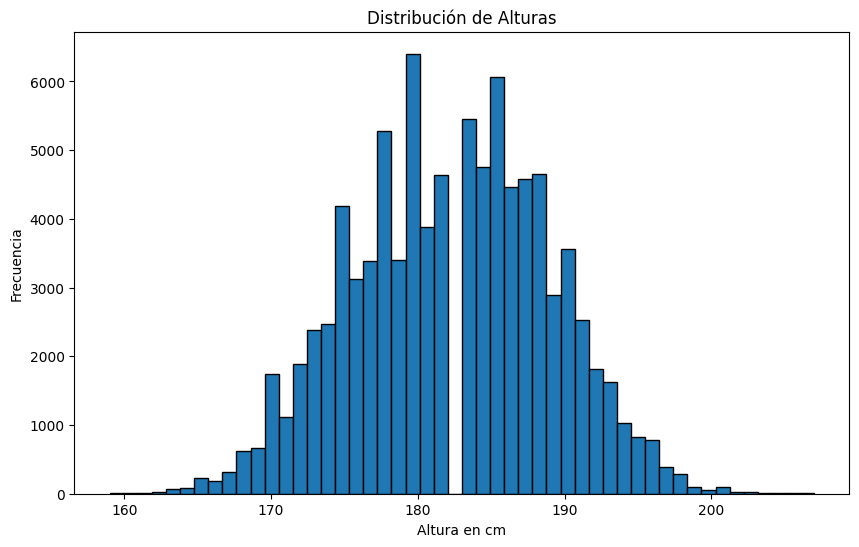

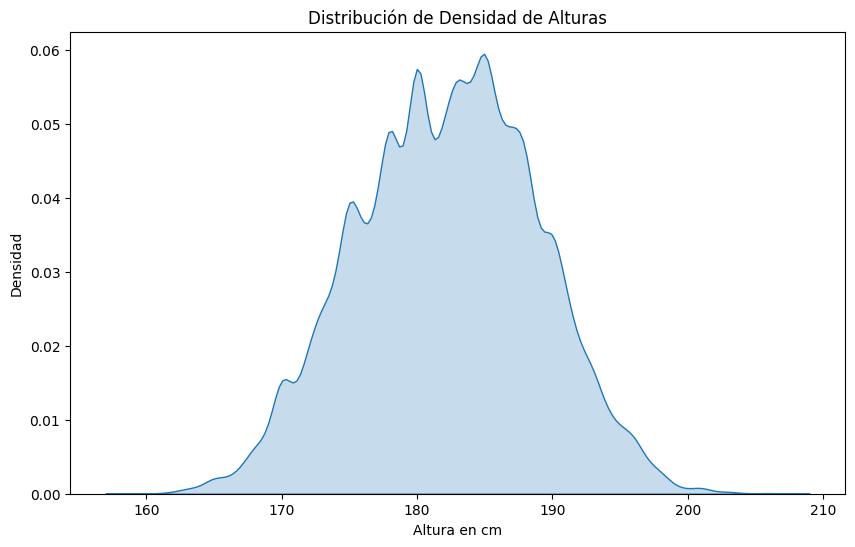

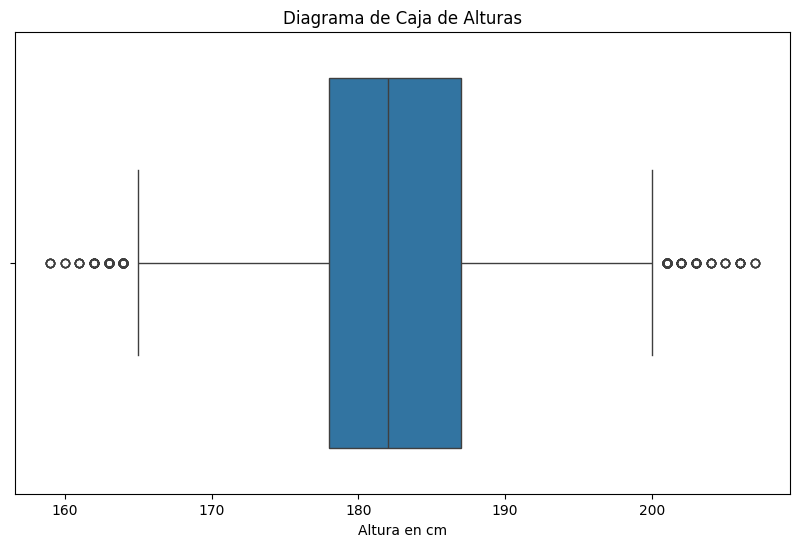

In [ ]:
#Conocer la distribución de la altura_cm
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['altura_cm'].dropna(), bins=50, edgecolor='k')
plt.title('Distribución de Alturas')
plt.xlabel('Altura en cm')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de Densidad
plt.figure(figsize=(10, 6))
sns.kdeplot(df['altura_cm'].dropna(), shade=True)
plt.title('Distribución de Densidad de Alturas')
plt.xlabel('Altura en cm')
plt.ylabel('Densidad')
plt.show()

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['altura_cm'])
plt.title('Diagrama de Caja de Alturas')
plt.xlabel('Altura en cm')
plt.show()

Dada la distribución vamos a realizar la imputación de los nulos de altura_cm con la mediana, para evitar que los outliers tengan efecto.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Imputar con la mediana
imputer_median = SimpleImputer(strategy='median')
df['altura_cm'] = imputer_median.fit_transform(df[['altura_cm']])

In [ ]:
df.describe()

,id_jugador,fecha_nacimiento,altura_cm,temporada,id_club,partidos_jugados,minutos_jugados,tarjetas_amarillas,tarjetas_rojas,goles,asistencias,valor_mercado
count,9.361000e+04,93559,93610.000000,93610.000000,93610.000000,93610.000000,93610.000000,93610.000000,93610.000000,93610.000000,93610.000000,9.361000e+04
mean,2.174498e+05,1992-07-16 11:14:02.022680704,182.227412,2018.082780,3615.015917,16.679821,1159.810116,2.475195,0.063476,1.608867,1.267931,4.250344e+06
min,1.000000e+01,1970-10-20 00:00:00,159.000000,2012.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+04
25%,5.997000e+04,1988-07-19 00:00:00,178.000000,2015.000000,347.000000,7.000000,330.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+05
50%,1.613560e+05,1992-08-22 00:00:00,182.000000,2018.000000,979.000000,15.000000,955.000000,2.000000,0.000000,0.000000,0.000000,1.000000e+06
75%,3.204400e+05,1996-09-12 12:00:00,187.000000,2021.000000,2727.000000,25.000000,1748.000000,4.000000,0.000000,2.000000,2.000000,3.500000e+06
max,1.240467e+06,2008-02-12 00:00:00,207.000000,2024.000000,101634.000000,61.000000,5174.000000,23.000000,3.000000,59.000000,33.000000,2.000000e+08
std,1.971396e+05,NaN,6.585823,3.620165,8766.902841,11.790257,970.239484,2.747802,0.256543,3.224279,2.210941,9.705915e+06


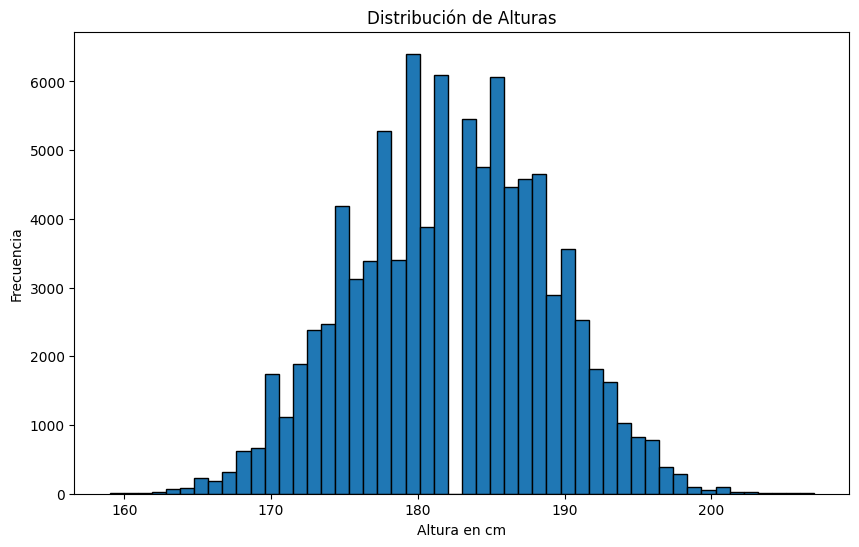

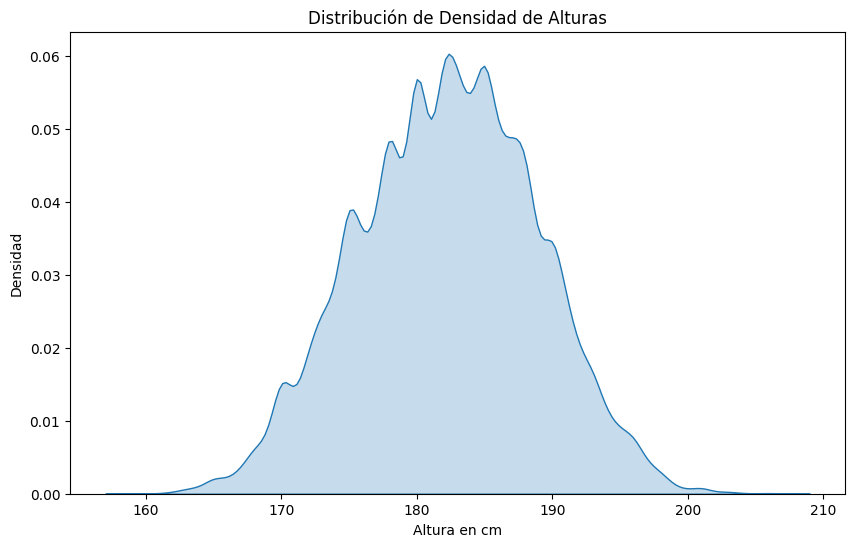

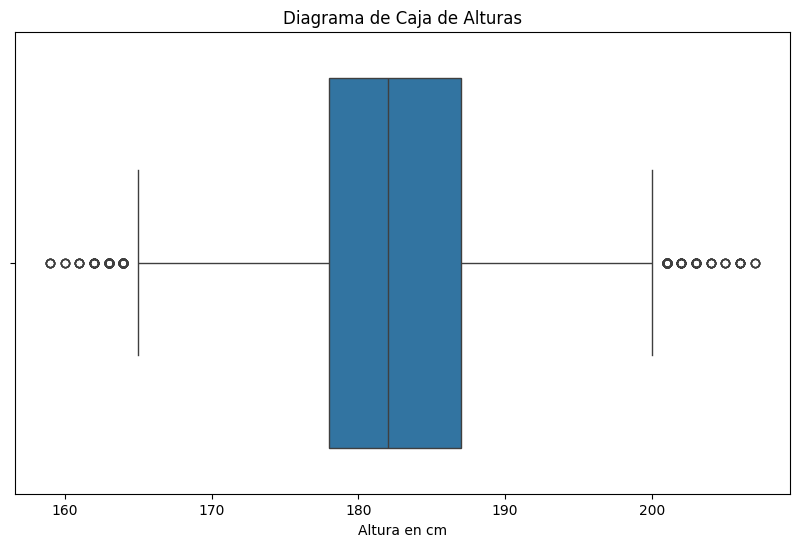

In [ ]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['altura_cm'], bins=50, edgecolor='k')
plt.title('Distribución de Alturas')
plt.xlabel('Altura en cm')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de Densidad
plt.figure(figsize=(10, 6))
sns.kdeplot(df['altura_cm'], shade=True)
plt.title('Distribución de Densidad de Alturas')
plt.xlabel('Altura en cm')
plt.ylabel('Densidad')
plt.show()

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['altura_cm'])
plt.title('Diagrama de Caja de Alturas')
plt.xlabel('Altura en cm')
plt.show()

In [ ]:
df.isnull().sum()

id_jugador               0
nombre_jugador           0
pais_nacimiento       1977
ciudad_nacimiento      148
pais_nacionalidad     1977
fecha_nacimiento        51
sub_posicion             0
posicion                 0
pie                   1971
altura_cm                0
temporada                0
id_club                  0
id_competencia           0
partidos_jugados         0
minutos_jugados          0
tarjetas_amarillas       0
tarjetas_rojas           0
goles                    0
asistencias              0
valor_mercado            0
dtype: int64

Para la imputación de la columna 'pie' utilizaremos la moda

In [ ]:
from sklearn.impute import SimpleImputer

# Crear el imputer con la estrategia de imputación 'most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Imputar los valores nulos en la columna 'pie' de tu DataFrame
df['pie'] = imputer.fit_transform(df['pie'].values.reshape(-1, 1))[:, 0]


In [ ]:
df.isnull().sum()#validar los nulos

id_jugador               0
nombre_jugador           0
pais_nacimiento       1977
ciudad_nacimiento      148
pais_nacionalidad     1977
fecha_nacimiento        51
sub_posicion             0
posicion                 0
pie                      0
altura_cm                0
temporada                0
id_club                  0
id_competencia           0
partidos_jugados         0
minutos_jugados          0
tarjetas_amarillas       0
tarjetas_rojas           0
goles                    0
asistencias              0
valor_mercado            0
dtype: int64

In [ ]:
pip install fancyimpute

In [ ]:
df.isnull().sum()

id_jugador               0
nombre_jugador           0
pais_nacimiento       1977
ciudad_nacimiento      148
pais_nacionalidad     1977
fecha_nacimiento        51
sub_posicion             0
posicion                 0
pie                      0
altura_cm                0
temporada                0
id_club                  0
id_competencia           0
partidos_jugados         0
minutos_jugados          0
tarjetas_amarillas       0
tarjetas_rojas           0
goles                    0
asistencias              0
valor_mercado            0
dtype: int64

Para Reemplazar los nulos de la fecha_nacimiento utilizaremos la libreria de sklearn y el modelo de KNN

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer
from datetime import datetime

# Convertir la fecha de nacimiento a una representación numérica (días desde una fecha base)
df['fecha_nacimiento'] = pd.to_datetime(df['fecha_nacimiento'])
df['fecha_nacimiento'] = (df['fecha_nacimiento'] - datetime(1970, 1, 1)).dt.days

# Imputar valores usando KNN
imputer = KNNImputer(n_neighbors=2)  # Ajustar el número de vecinos según tu caso
df_imputed = imputer.fit_transform(df[['fecha_nacimiento']])

# Convertir de nuevo a formato de fecha
df['fecha_nacimiento'] = pd.to_datetime(df_imputed, origin='unix', unit='D')


In [ ]:
df.isnull().sum()

id_jugador               0
nombre_jugador           0
pais_nacimiento       1977
ciudad_nacimiento      148
pais_nacionalidad     1977
fecha_nacimiento         0
sub_posicion             0
posicion                 0
pie                      0
altura_cm                0
temporada                0
id_club                  0
id_competencia           0
partidos_jugados         0
minutos_jugados          0
tarjetas_amarillas       0
tarjetas_rojas           0
goles                    0
asistencias              0
valor_mercado            0
dtype: int64

Para los nulos de pais_nacimiento o ciudad_nacimiento vamos a registrarlos como "NRPCN" (No Registra Pais o Ciudad de Nacimiento)

In [ ]:
df['pais_nacimiento'] = df['pais_nacimiento'].fillna('NRPCN')
df['ciudad_nacimiento'] = df['ciudad_nacimiento'].fillna('NRPCN')
df['pais_nacionalidad'] = df['pais_nacionalidad'].fillna('NRPCN')

In [ ]:
#Confirmar que no hayan nulos en el dataframe
df.isnull().sum()

id_jugador            0
nombre_jugador        0
pais_nacimiento       0
ciudad_nacimiento     0
pais_nacionalidad     0
fecha_nacimiento      0
sub_posicion          0
posicion              0
pie                   0
altura_cm             0
temporada             0
id_club               0
id_competencia        0
partidos_jugados      0
minutos_jugados       0
tarjetas_amarillas    0
tarjetas_rojas        0
goles                 0
asistencias           0
valor_mercado         0
dtype: int64

Validación de outliers

In [ ]:
varNumericas = ['altura_cm','partidos_jugados','minutos_jugados','tarjetas_amarillas','tarjetas_rojas','goles','asistencias']

In [ ]:
varCategoricas = ['pais_nacimiento','ciudad_nacimiento','pais_nacionalidad','sub_posicion','posicion','pie','id_club','id_competencia','temporada']

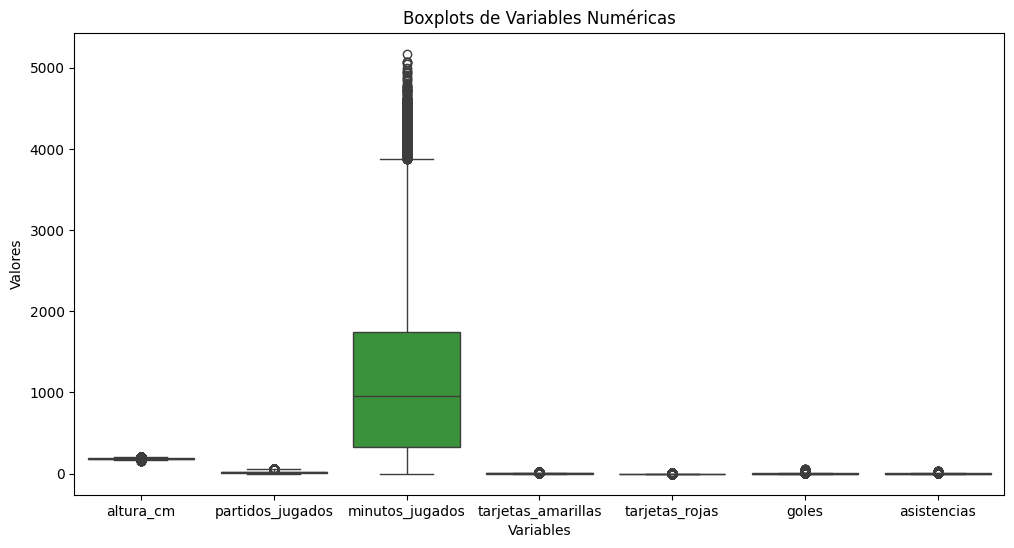

In [ ]:
# Configuración del tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crear el gráfico de boxplots
sns.boxplot(data=df[varNumericas])

# Configuración de las etiquetas y el título
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.title('Boxplots de Variables Numéricas')

# Mostrar el gráfico
plt.show()


Revisar la variable minutos_jugados

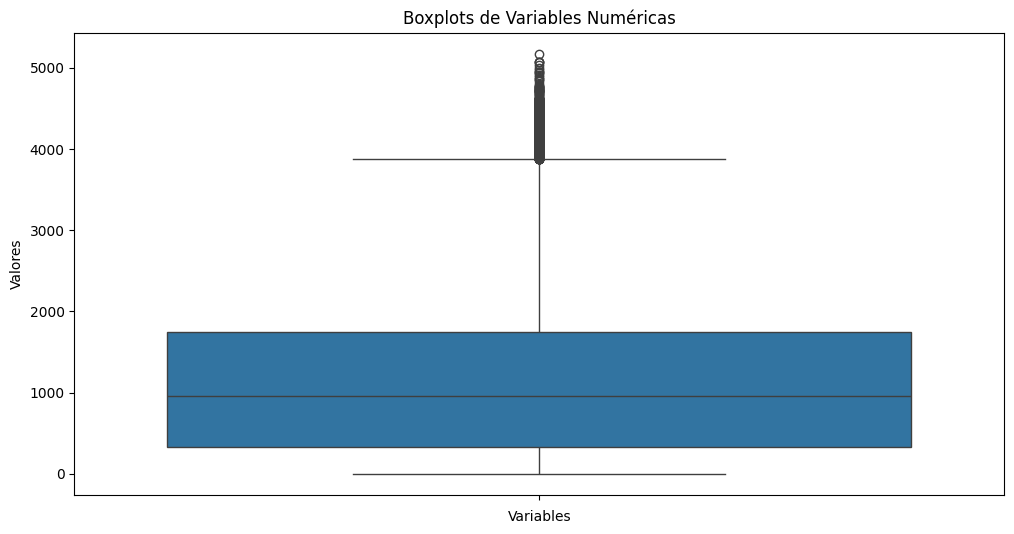

In [ ]:
# Configuración del tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crear el gráfico de boxplots
sns.boxplot(data=df['minutos_jugados'])

# Configuración de las etiquetas y el título
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.title('Boxplots de Variables Numéricas')

# Mostrar el gráfico
plt.show()

In [ ]:
df['minutos_jugados'].describe()

count    93610.000000
mean      1159.810116
std        970.239484
min          1.000000
25%        330.000000
50%        955.000000
75%       1748.000000
max       5174.000000
Name: minutos_jugados, dtype: float64

In [ ]:
#Revisar a que se deben los outliers
df.sort_values(by=['minutos_jugados'],ascending=False).head(5)

,id_jugador,nombre_jugador,pais_nacimiento,ciudad_nacimiento,pais_nacionalidad,fecha_nacimiento,sub_posicion,posicion,pie,altura_cm,temporada,id_club,id_competencia,partidos_jugados,minutos_jugados,tarjetas_amarillas,tarjetas_rojas,goles,asistencias,valor_mercado
62073,240306,Bruno Fernandes,Portugal,Maia,Portugal,"(1994-09-08 00:00:00,)",Attacking Midfield,Midfield,right,179.0,2023,985,GB1,59,5174,14,0,15,16,75000000.0
1621,5658,Petr Cech,CSSR,Plzeň,Czech Republic,"(1982-05-20 00:00:00,)",Goalkeeper,Goalkeeper,left,196.0,2013,631,GB1,56,5070,1,0,0,0,25000000.0
42020,128901,Conor Coady,England,Liverpool,England,"(1993-02-25 00:00:00,)",Centre-Back,Defender,right,185.0,2019,543,GB1,56,5070,4,0,0,0,18000000.0
60982,234509,André Onana,Cameroon,Nkol Ngok,Cameroon,"(1996-04-02 00:00:00,)",Goalkeeper,Goalkeeper,right,190.0,2023,985,GB1,56,5070,5,0,0,0,40000000.0
3498,12589,Craig Gordon,Scotland,Edinburgh,Scotland,"(1982-12-31 00:00:00,)",Goalkeeper,Goalkeeper,left,193.0,2017,371,SC1,56,5040,1,0,0,0,2500000.0


Los outliers que se presentan en minutos jugados no tienen ningun problema, se da por que son los jugadores que mas partidos juegan por temporada y adicionalmente juegan casi todos los partidos completos, pero es completamente posible por lo tanto no es necesario realizar ajustes.

# Exploratory Data Analysis (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93610 entries, 0 to 97260
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_jugador          93610 non-null  int64  
 1   nombre_jugador      93610 non-null  object 
 2   pais_nacimiento     93610 non-null  object 
 3   ciudad_nacimiento   93610 non-null  object 
 4   pais_nacionalidad   93610 non-null  object 
 5   fecha_nacimiento    93610 non-null  object 
 6   sub_posicion        93610 non-null  object 
 7   posicion            93610 non-null  object 
 8   pie                 93610 non-null  object 
 9   altura_cm           93610 non-null  float64
 10  temporada           93610 non-null  int32  
 11  id_club             93610 non-null  int64  
 12  id_competencia      93610 non-null  object 
 13  partidos_jugados    93610 non-null  int64  
 14  minutos_jugados     93610 non-null  int64  
 15  tarjetas_amarillas  93610 non-null  int64  
 16  tarjetas_

In [ ]:
df.describe()

,id_jugador,altura_cm,temporada,id_club,partidos_jugados,minutos_jugados,tarjetas_amarillas,tarjetas_rojas,goles,asistencias,valor_mercado
count,9.361000e+04,93610.000000,93610.000000,93610.000000,93610.000000,93610.000000,93610.000000,93610.000000,93610.000000,93610.000000,9.361000e+04
mean,2.174498e+05,182.227412,2018.082780,3615.015917,16.679821,1159.810116,2.475195,0.063476,1.608867,1.267931,4.250344e+06
std,1.971396e+05,6.585823,3.620165,8766.902841,11.790257,970.239484,2.747802,0.256543,3.224279,2.210941,9.705915e+06
min,1.000000e+01,159.000000,2012.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+04
25%,5.997000e+04,178.000000,2015.000000,347.000000,7.000000,330.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+05
50%,1.613560e+05,182.000000,2018.000000,979.000000,15.000000,955.000000,2.000000,0.000000,0.000000,0.000000,1.000000e+06
75%,3.204400e+05,187.000000,2021.000000,2727.000000,25.000000,1748.000000,4.000000,0.000000,2.000000,2.000000,3.500000e+06
max,1.240467e+06,207.000000,2024.000000,101634.000000,61.000000,5174.000000,23.000000,3.000000,59.000000,33.000000,2.000000e+08


## Analisis de Variables Categoricas

In [ ]:
#Data frame con unicamente un registro por jugador
df_unico = df.drop_duplicates(subset=['id_jugador'])

In [ ]:
graficopais = df_unico['pais_nacimiento'].value_counts().head(10)

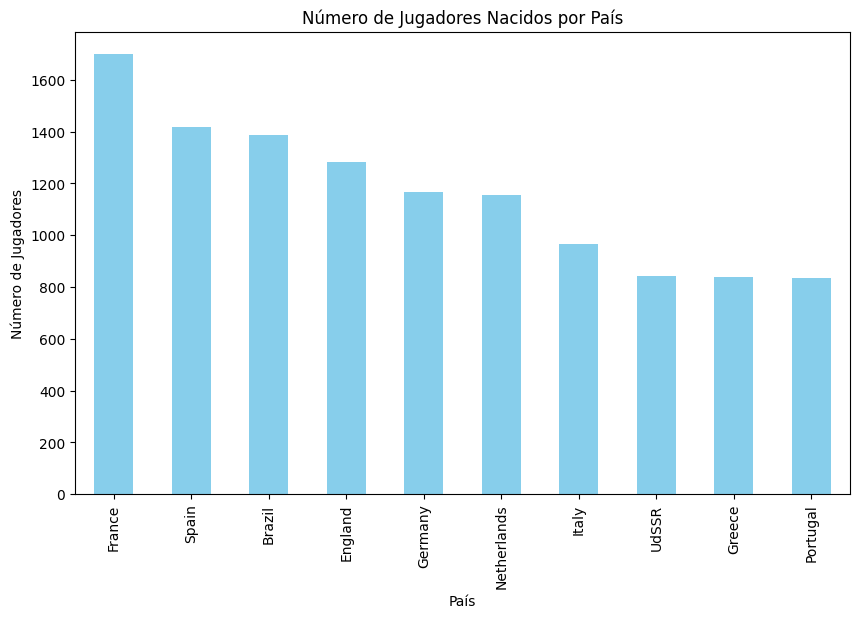

In [ ]:
import matplotlib.pyplot as plt

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
graficopais.plot(kind='bar', color='skyblue')

# Configurar las etiquetas y el título
plt.xlabel('País')
plt.ylabel('Número de Jugadores')
plt.title('Número de Jugadores Nacidos por País')

# Mostrar el gráfico
plt.show()


In [ ]:
pieHabil = df_unico['pie'].value_counts()
pieHabil

pie
right    16463
left      5584
both      1076
Name: count, dtype: int64

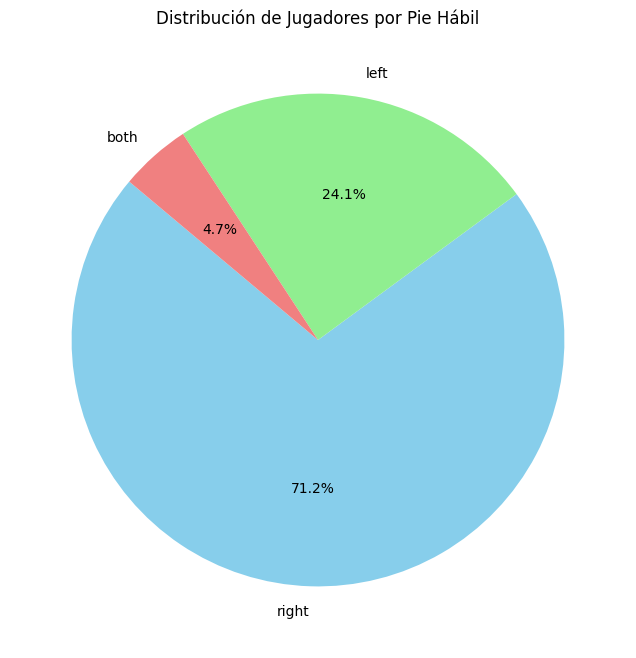

In [ ]:

# Configurar el gráfico de pie
plt.figure(figsize=(8, 8))
plt.pie(pieHabil, labels=pieHabil.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral'])

# Añadir título
plt.title('Distribución de Jugadores por Pie Hábil')

# Mostrar el gráfico
plt.show()


In [ ]:
grafCompetencias = df_unico['id_competencia'].value_counts().head(5)

competiciones[['competition_id','name']]

grafCompetencias = pd.merge(grafCompetencias,competiciones[['competition_id','name']],
                     left_on=['id_competencia'],
                     right_on=['competition_id'],
                     how='left')

In [ ]:
grafCompetencias

,count,competition_id,name
0,2074,PO1,liga-portugal-bwin
1,1794,FR1,ligue-1
2,1742,NL1,eredivisie
3,1685,GR1,super-league-1
4,1665,IT1,serie-a


In [ ]:

import altair as alt
chart = alt.Chart(grafCompetencias).mark_bar().encode(
    x = alt.X('count:Q', title='Nº de jugadores'),
    y = alt.Y('name:N', sort=alt.EncodingSortField(field="count", order="descending"), title='Competiciones'),
    color = alt.Color('competition_id:N', legend=None)
).properties(height=200)
chart


alt.Chart(...)

## Variables Numericas

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
varNumericas = ['altura_cm','partidos_jugados','minutos_jugados','tarjetas_amarillas','tarjetas_rojas','goles','asistencias','valor_mercado']

In [ ]:
df[varNumericas].corr()

,altura_cm,partidos_jugados,minutos_jugados,tarjetas_amarillas,tarjetas_rojas,goles,asistencias,valor_mercado
altura_cm,1.000000,-0.019897,0.051272,-0.013738,0.032447,-0.045172,-0.192405,-0.008912
partidos_jugados,-0.019897,1.000000,0.944646,0.641348,0.139565,0.502728,0.566953,0.423214
minutos_jugados,0.051272,0.944646,1.000000,0.656617,0.148867,0.444379,0.518828,0.403729
tarjetas_amarillas,-0.013738,0.641348,0.656617,1.000000,0.140517,0.256200,0.323627,0.230374
tarjetas_rojas,0.032447,0.139565,0.148867,0.140517,1.000000,0.046895,0.049213,0.041692
goles,-0.045172,0.502728,0.444379,0.256200,0.046895,1.000000,0.596820,0.433955
asistencias,-0.192405,0.566953,0.518828,0.323627,0.049213,0.596820,1.000000,0.421347
valor_mercado,-0.008912,0.423214,0.403729,0.230374,0.041692,0.433955,0.421347,1.000000


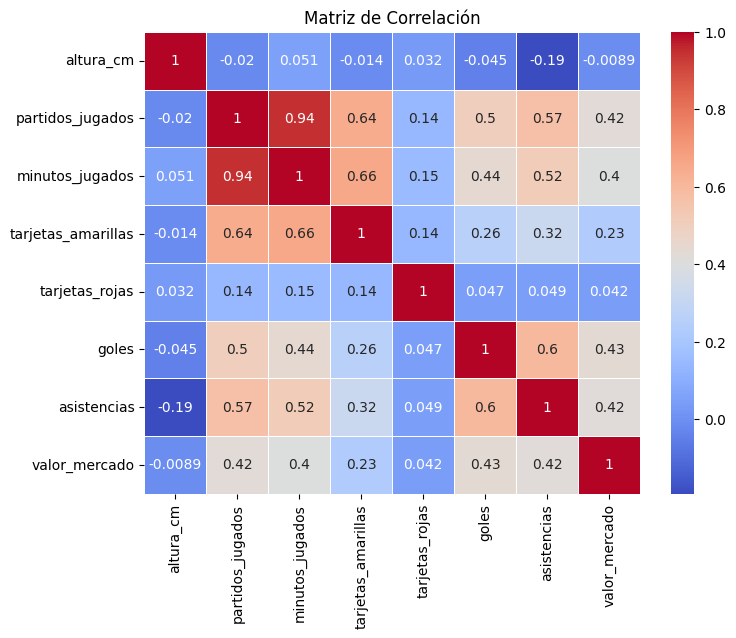

In [ ]:
# Crear un mapa de calor (heatmap) con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(df[varNumericas].corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()


In [279]:
jugadoresCaros = df[['nombre_jugador','valor_mercado','temporada']]

jugadoresCaros = jugadoresCaros.groupby(['temporada','nombre_jugador'])['valor_mercado'].max().sort_values(ascending=False).head(50)
#jugadoresCaros = jugadoresCaros.sort_index(ascending=False)
jugadoresCaros

temporada  nombre_jugador   
2018       Kylian Mbappé        200000000.0
2019       Kylian Mbappé        200000000.0
2024       Erling Haaland       180000000.0
           Kylian Mbappé        180000000.0
2022       Kylian Mbappé        180000000.0
2024       Vinicius Junior      180000000.0
2018       Neymar               180000000.0
2024       Jude Bellingham      180000000.0
2019       Neymar               180000000.0
2020       Kylian Mbappé        180000000.0
2023       Kylian Mbappé        180000000.0
2018       Lionel Messi         180000000.0
2023       Jude Bellingham      180000000.0
           Erling Haaland       180000000.0
2022       Erling Haaland       170000000.0
2019       Raheem Sterling      160000000.0
2021       Kylian Mbappé        160000000.0
2019       Mohamed Salah        150000000.0
           Lionel Messi         150000000.0
           Sadio Mané           150000000.0
2018       Philippe Coutinho    150000000.0
           Antoine Griezmann    150000000.0
   